In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [76]:
test = pd.read_table('C:/Users/kosuke/signate/wine/test.tsv')
train = pd.read_table('C:/Users/kosuke/signate/wine/train.tsv',index_col=0)
test_i = test.set_index('id')

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [77]:
train.head()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,,
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 177
Data columns (total 14 columns):
Y                               89 non-null int64
Alcohol                         89 non-null float64
Malic acid                      89 non-null float64
Ash                             89 non-null float64
Alcalinity of ash               89 non-null float64
Magnesium                       89 non-null int64
Total phenols                   89 non-null float64
Flavanoids                      89 non-null float64
Nonflavanoid phenols            89 non-null float64
Proanthocyanins                 89 non-null float64
Color intensity                 89 non-null float64
Hue                             89 non-null float64
OD280/OD315 of diluted wines    89 non-null float64
Proline                         89 non-null int64
dtypes: float64(11), int64(3)
memory usage: 10.4 KB


In [79]:
train.isnull().sum()

Y                               0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [80]:
X = pd.DataFrame()
X = train.drop(['Y'], 1)

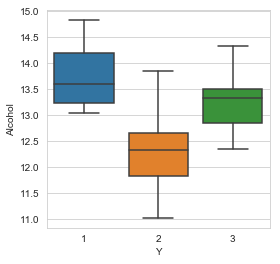

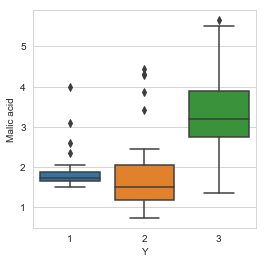

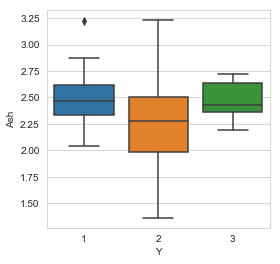

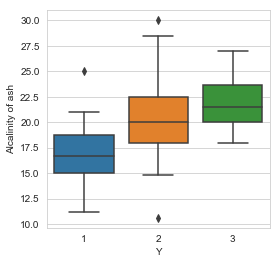

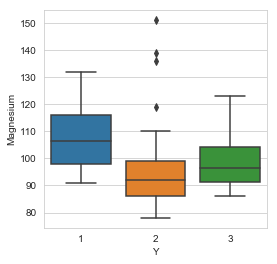

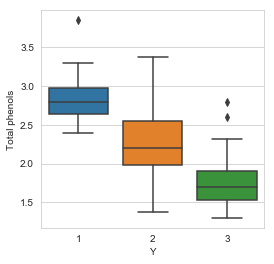

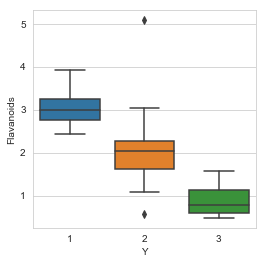

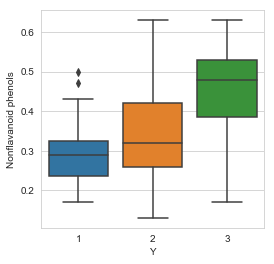

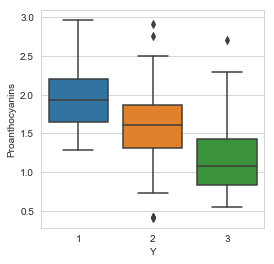

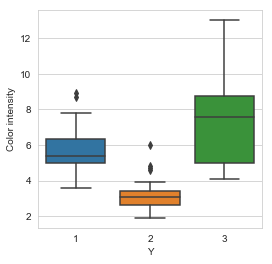

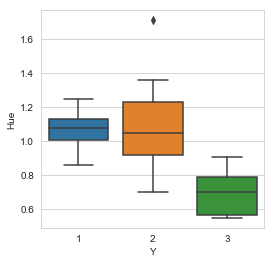

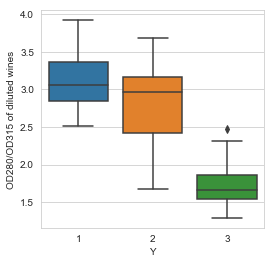

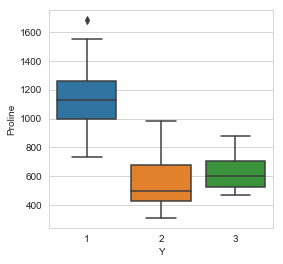

In [7]:
for i in X.columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x = "Y",y = i, data = train)

In [9]:
cols = train.columns
#平均値
mean = train.mean()
#標準偏差
sigma = train.std()

df = train
#for文で外れ値を除去
for col in cols:
    #3σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3* sigma[col]
    #条件での絞り込み
    df = df[(df[col] > low) & (df[col] < high)]

In [10]:
len(df)

84

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = pd.DataFrame()
X = train.drop(['Y'], 1)
y = train['Y']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, 
                                                    shuffle=True, random_state=42)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
cv_score = cross_val_score(knn, X_scaled, y, cv=5, scoring="accuracy")
pd.DataFrame(cv_score).rename(columns={0: '正解率'})

,正解率
0,0.947368
1,0.947368
2,0.888889
3,0.941176
4,1.000000


In [84]:
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.9449604403164775


[1] score: 0.93
[2] score: 0.89
[3] score: 0.96
[4] score: 0.96
[5] score: 0.96
[6] score: 1.00
[7] score: 1.00
[8] score: 0.96
[9] score: 0.96
[10] score: 0.96
[11] score: 0.96
[12] score: 0.96
[13] score: 0.96
[14] score: 0.96
[15] score: 1.00
[16] score: 0.93
[17] score: 0.96
[18] score: 0.93
[19] score: 0.96
[20] score: 0.93
[21] score: 0.93
[22] score: 0.93
[23] score: 0.89
[24] score: 0.85
[25] score: 0.81
[26] score: 0.78
[27] score: 0.78
[28] score: 0.70
[29] score: 0.63
[30] score: 0.63
[31] score: 0.63
[32] score: 0.63
[33] score: 0.63
[34] score: 0.63
[35] score: 0.63
[36] score: 0.63
[37] score: 0.59
[38] score: 0.59
[39] score: 0.56
[40] score: 0.52
[41] score: 0.52
[42] score: 0.48
[43] score: 0.44
[44] score: 0.30
[45] score: 0.26
[46] score: 0.26
[47] score: 0.26
[48] score: 0.26
[49] score: 0.26
[50] score: 0.26
[51] score: 0.26
[52] score: 0.26
[53] score: 0.26
[54] score: 0.26
[55] score: 0.26
[56] score: 0.26
[57] score: 0.26
[58] score: 0.26
[59] score: 0.26
[60] s

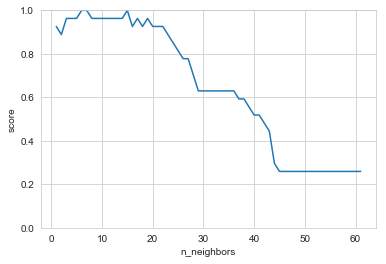

In [103]:
from sklearn import metrics
list_nn = []
list_score = []
for k in range(1, 62): # K = 1~30
  # KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # 予測　
  y_pred = knn.predict(X_val)

  # 評価 R^2
  score = knn.score(X_val, y_val)
  print("[%d] score: {:.2f}".format(score) % k)

  list_nn.append(k)
  list_score.append(score)
    
#plot
plt.ylim(0, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

In [60]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR(penalty='l2',C=1)
lr.fit(X_train,y_train)


C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
cv_score = cross_val_score(lr, X_scaled, y, cv=5, scoring="accuracy")
pd.DataFrame(cv_score).rename(columns={0: '正解率'})

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

,正解率
0,1.000000
1,0.947368
2,0.944444
3,1.000000
4,1.000000


In [63]:
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.9783625730994151


In [64]:
lr.fit(X,y)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
odds = np.exp(lr.coef_).flatten()
odds_df = pd.DataFrame([X.columns, odds], index=['features', 'odds']).T

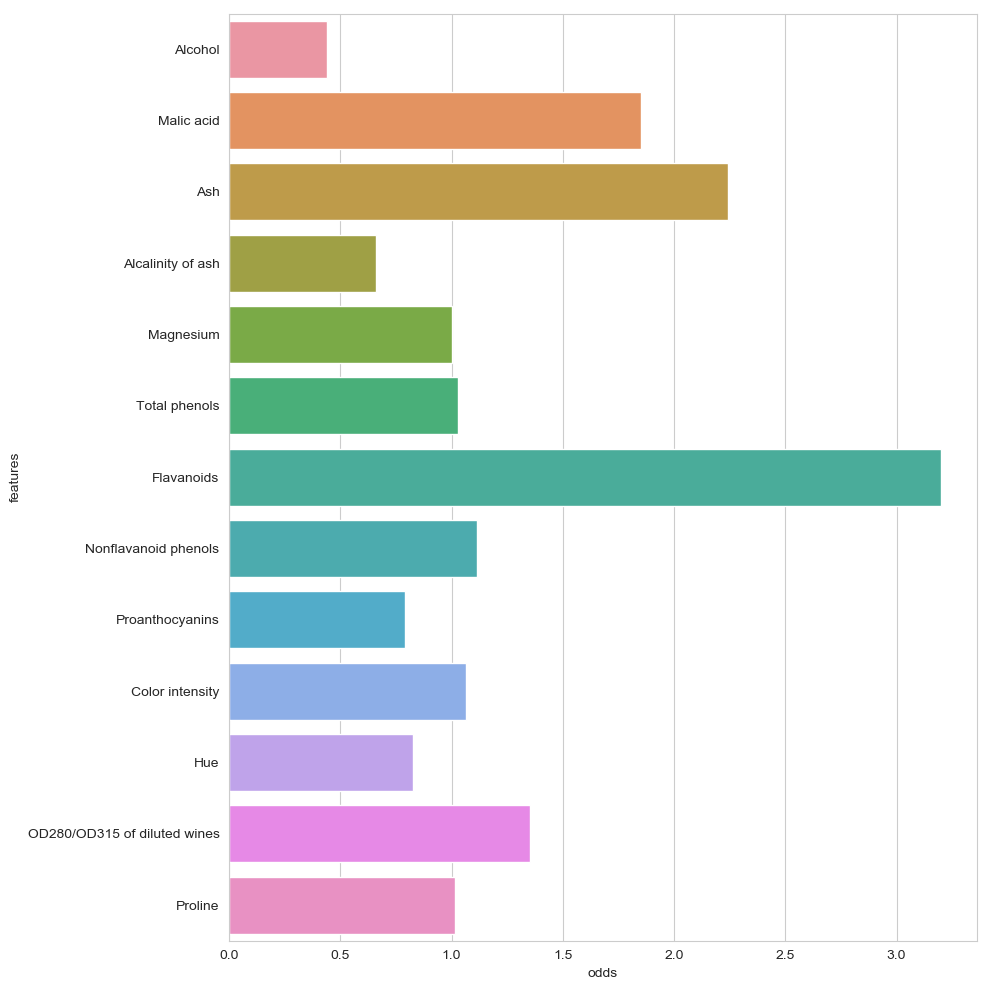

In [66]:
plt.figure(figsize=(10,10),dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()

In [67]:
test['Y']=lr.predict(test_i)

In [35]:
test[['id', 'Y']].to_csv('./submit9.csv', header=False, index=False)

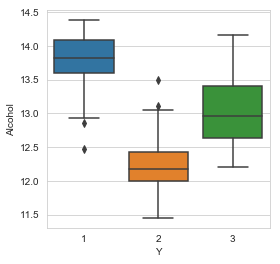

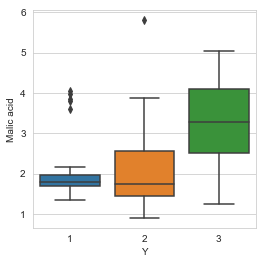

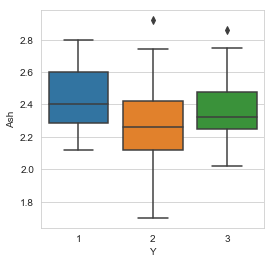

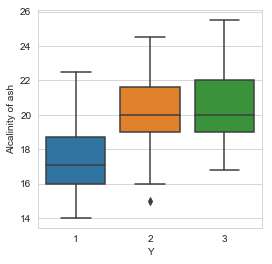

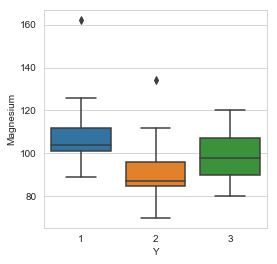

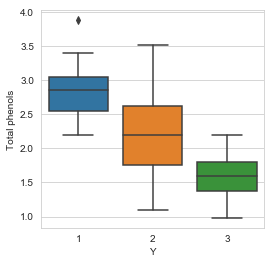

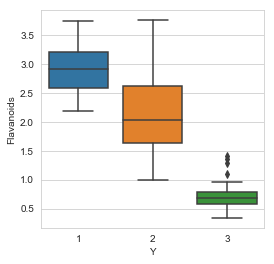

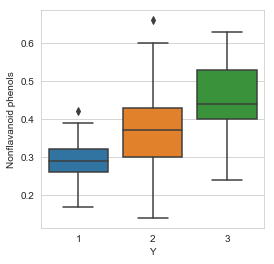

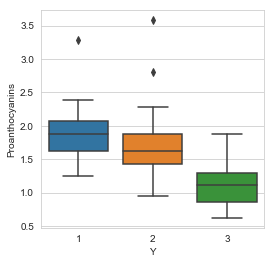

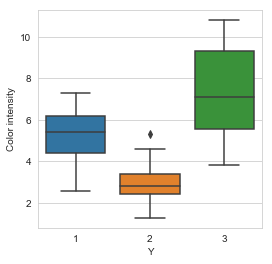

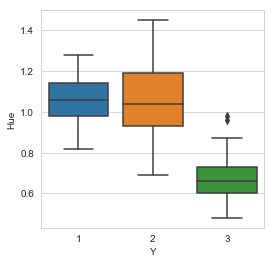

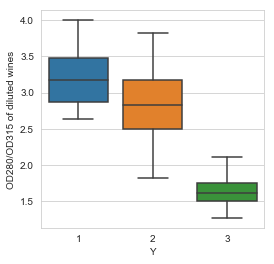

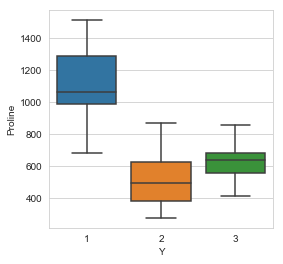

In [69]:
for i in test_i.columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x = "Y",y = i, data = test)

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
tuning_parm = [
    {'C': [0.1, 0.01,1, 10, 100], 'penalty': ['l2', 'l1']}
]

clf = GridSearchCV(LR(), tuning_parm, cv=10, scoring='accuracy', return_train_score=True)

In [72]:
clf.fit(X_train, y_train)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 0.01, 1, 10, 100], 'penalty': ['l2', 'l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [73]:
result_df = pd.DataFrame.from_dict(clf.cv_results_)
col = ['mean_train_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
4,1.000000,"{'C': 1, 'penalty': 'l2'}"
5,1.000000,"{'C': 1, 'penalty': 'l1'}"
6,1.000000,"{'C': 10, 'penalty': 'l2'}"
7,1.000000,"{'C': 10, 'penalty': 'l1'}"
8,1.000000,"{'C': 100, 'penalty': 'l2'}"
9,1.000000,"{'C': 100, 'penalty': 'l1'}"
0,0.982044,"{'C': 0.1, 'penalty': 'l2'}"
2,0.962399,"{'C': 0.01, 'penalty': 'l2'}"
1,0.924733,"{'C': 0.1, 'penalty': 'l1'}"
3,0.306449,"{'C': 0.01, 'penalty': 'l1'}"


In [74]:
clf.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)